In [1]:
import pandas as pd
import functions as fn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tickers = pd.read_csv("../data/nasdaq_comps_2016-2020.csv")

In [3]:
tickers = list(set(tickers['2019']).intersection(set(tickers['2018'])))
etf = 'QQQ'
start = '2018-01-01'
end = '2018-12-31'
cointegrationResultsIndividual = fn.runCointTestIndividual(etf, tickers, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
CSCO
[*********************100%***********************]  1 of 1 completed
DLTR
[*********************100%***********************]  1 of 1 completed
SBUX
[*********************100%***********************]  1 of 1 completed
COST
[*********************100%***********************]  1 of 1 completed
QCOM
[*********************100%***********************]  1 of 1 completed
MXIM
[*********************100%***********************]  1 of 1 completed
ISRG
[*********************100%***********************]  1 of 1 completed
AVGO
[*********************100%***********************]  1 of 1 completed
VRSK
[*********************100%***********************]  1 of 1 completed
CDNS
[*********************100%***********************]  1 of 1 completed
WDC
[*********************100%***********************]  1 of 1 completed
HSIC
[*********************100%******************

In [4]:
cointegrationResultsIndividual.head()

,ticker,t-stat,pval
81,HAS,-3.476138,0.034570
49,AAPL,-3.268703,0.059170
32,TTWO,-3.186715,0.072178
79,IDXX,-3.156778,0.077458
2,SBUX,-3.125705,0.083256


In [5]:
subset = cointegrationResultsIndividual.loc[cointegrationResultsIndividual['pval'] <= 0.1]
tickers = subset['ticker'].tolist()
etf = 'QQQ'
start = '2018-01-01'
end = '2018-12-31'
synthetic_asset_rank = fn.runCointTestBasketsJoh(etf, tickers, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  6 of 6 completed
0 done, out of a total of  57


In [6]:
synthetic_asset_rank.head()

,ticker,critical-values,trace-stat
54,"[HAS, TTWO, IDXX, SBUX, CTAS]","[2.7055, 3.8415, 6.6349]",0.145208
43,"[HAS, TTWO, SBUX, CTAS]","[2.7055, 3.8415, 6.6349]",0.157698
41,"[HAS, TTWO, IDXX, SBUX]","[2.7055, 3.8415, 6.6349]",0.310910
0,"[HAS, AAPL]","[2.7055, 3.8415, 6.6349]",0.370229
34,"[IDXX, SBUX, CTAS]","[2.7055, 3.8415, 6.6349]",0.389494


In [7]:
# Start from 01-01-2019 and end at 12-31-2019
qqq = pd.read_csv("../data/qqqMinute2019.csv")
has = pd.read_csv("../data/hasMinute2019.csv")
ttwo = pd.read_csv("../data/ttwoMinute2019.csv")
idxx = pd.read_csv("../data/idxxMinute2019.csv")
sbux = pd.read_csv("../data/sbuxMinute2019.csv")
ctas = pd.read_csv("../data/ctasMinute2019.csv")

In [8]:
qqq = qqq.set_index('date_time')
qqq = qqq.rename(columns={'close': 'qqqclose'})

has = has.set_index('date_time')
has = has.rename(columns={'close': 'hasclose'})

ttwo = ttwo.set_index('date_time')
ttwo = ttwo.rename(columns={'close': 'ttwoclose'})

idxx = idxx.set_index('date_time')
idxx = idxx.rename(columns={'close': 'idxxclose'})

sbux = sbux.set_index('date_time')
sbux = sbux.rename(columns={'close': 'sbuxclose'})

ctas = ctas.set_index('date_time')
ctas = ctas.rename(columns={'close': 'ctasclose'})

data = qqq[['qqqclose']].join([has[['hasclose']], ttwo[['ttwoclose']], idxx[['idxxclose']], 
                               sbux[['sbuxclose']], ctas[['ctasclose']]], how='outer')
data = data.dropna()
data.tail(20)

,qqqclose,hasclose,ttwoclose,idxxclose,sbuxclose,ctasclose
2019-12-31 15:30:00,212.345,105.7300,122.2000,260.78,87.6850,268.2800
2019-12-31 15:31:00,212.330,105.7100,122.1600,260.86,87.7050,268.3100
2019-12-31 15:32:00,212.355,105.6972,122.1200,260.94,87.7130,268.3200
2019-12-31 15:33:00,212.360,105.6900,122.1800,260.85,87.7250,268.4400
2019-12-31 15:34:00,212.365,105.6900,122.2200,260.91,87.7700,268.4900
2019-12-31 15:35:00,212.385,105.6800,122.1800,260.89,87.7650,268.4800
2019-12-31 15:36:00,212.370,105.6500,122.2000,260.92,87.7600,268.4793
2019-12-31 15:37:00,212.350,105.6200,122.1700,260.73,87.7600,268.4900
2019-12-31 15:38:00,212.385,105.6200,122.1298,260.51,87.7600,268.5600
2019-12-31 15:39:00,212.355,105.6044,122.1050,260.52,87.7500,268.5800


In [9]:
syntheticAssetLogPrice = data[['hasclose', 'ttwoclose', 'idxxclose', 'sbuxclose', 'ctasclose']].apply(np.log)
qqqLogPrice = np.log(data['qqqclose'].values)

In [10]:
kf = fn.multivariateKalmanFilter(syntheticAssetLogPrice, qqqLogPrice)
state_means, state_covs = kf.filter(qqqLogPrice)
slopes=state_means[:, [0, 1, 2, 3, 4]]
intercept=state_means[:, 5]

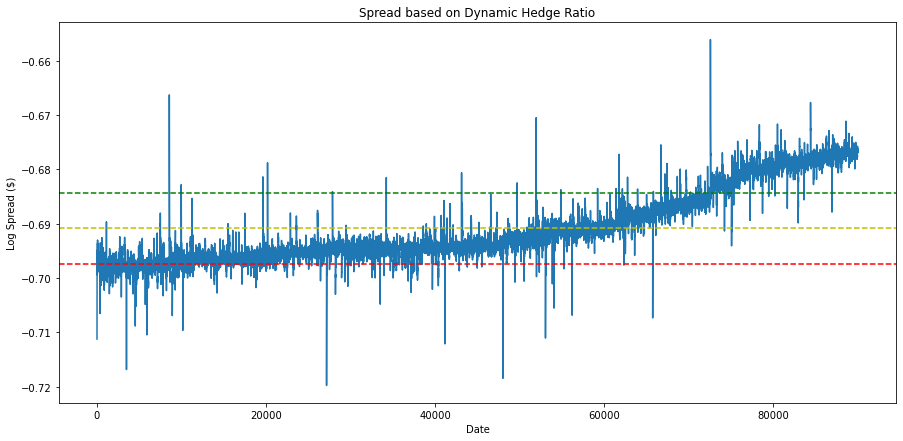

In [11]:
syntheticAssetEstimate = [np.dot(slopes[i], syntheticAssetLogPrice.values[i].T) for i in range(len(slopes))]
spread_ts = qqqLogPrice - syntheticAssetEstimate
plt.figure(figsize = (15,7))
plt.plot(spread_ts)
plt.title("Spread based on Dynamic Hedge Ratio")
plt.ylabel("Log Spread ($)")
plt.xlabel("Date")
spread_avg = spread_ts.mean()
spread_sd = spread_ts.std()
upper_threshold = spread_avg + spread_sd
lower_threshold = spread_avg - spread_sd
plt.axhline(upper_threshold, linestyle = 'dashed', color = 'g')
plt.axhline(spread_avg, linestyle = 'dashed', color = 'y')
plt.axhline(lower_threshold, linestyle = 'dashed', color = 'r')

In [12]:
data.reset_index(inplace=True)
data['logspread'] = spread_ts
data['spread'] = np.exp(spread_ts)
data = data.rename(columns={'index': 'datetime'})

In [13]:
backtest_data = data[['datetime', 'qqqclose', 'hasclose', 'ttwoclose', 'idxxclose', 'sbuxclose', 'ctasclose', 'spread']]
lookback = 240
z_thresh = 1.5
backtest_data = fn.createBands(backtest_data, lookback, z_thresh)

Text(0.5, 0, 'Date')

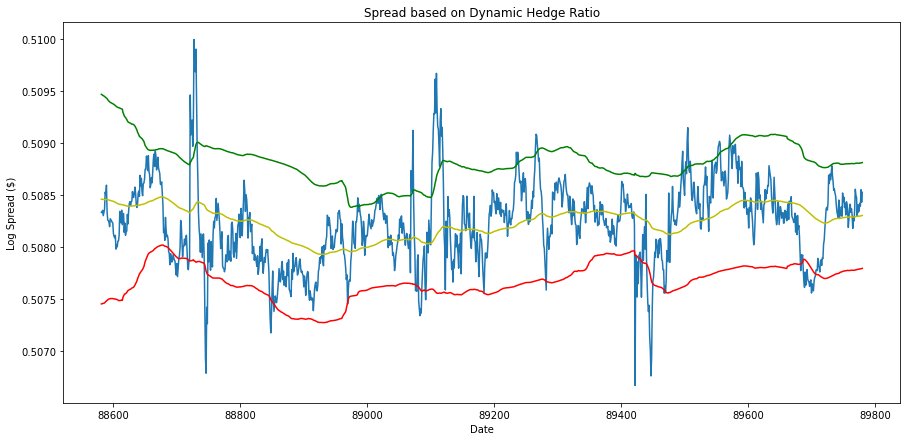

In [14]:
plt.figure(figsize = (15,7))
plt.plot(backtest_data['spread'].iloc[-1200:])
plt.plot(backtest_data['upperband'].iloc[-1200:], color='g')
plt.plot(backtest_data['ema'].iloc[-1200:], color='y')
plt.plot(backtest_data['lowerband'].iloc[-1200:], color='r')
plt.title("Spread based on Dynamic Hedge Ratio")
plt.ylabel("Log Spread ($)")
plt.xlabel("Date")

In [15]:
backtest_data = fn.createSignal(backtest_data)
backtest_data['position'] = backtest_data['signal'].shift(1).fillna(0)

In [16]:
backtest_data['hedgeRatioHAS'] = slopes[:, 0][lookback - 1:]
backtest_data['hedgeRatioTTWO'] = slopes[:, 1][lookback - 1:]
backtest_data['hedgeRatioIDXX'] = slopes[:, 2][lookback - 1:]
backtest_data['hedgeRatioSBUX'] = slopes[:, 3][lookback -1 :]
backtest_data['hedgeRatioCTAS'] = slopes[:, 4][lookback - 1:]

In [17]:
tradeLog = fn.constructTradeLog(backtest_data['datetime'].values, backtest_data['position'].values,
                               backtest_data['qqqclose'].values, 
                               backtest_data[['hasclose', 'ttwoclose', 'idxxclose', 'sbuxclose', 
                                              'ctasclose']].values, 
                               backtest_data[['hedgeRatioHAS', 'hedgeRatioTTWO', 'hedgeRatioIDXX', 
                                              'hedgeRatioSBUX', 'hedgeRatioCTAS']].values.round(3), 
                               lot_size = 1000)
tradeLog.tail()

,start,end,holdingPeriod,positionSizeY,entryY,exitY,positionSizeX,entryX,exitX,position,profit,returns
4,2019-12-31 09:42:00,2019-12-31 10:00:00,17,1000,212.2324,212.2800,"[156.0, 197.0, 319.0, 171.0, 325.0]","[105.615, 122.08, 261.5, 87.75, 268.65]","[105.905, 121.97, 261.52, 87.66, 269.32]",1.0,-184.7100,-0.000421
3,2019-12-31 10:02:00,2019-12-31 10:37:00,34,1000,212.2100,211.9248,"[156.0, 197.0, 319.0, 171.0, 325.0]","[105.91, 122.1998, 261.62, 87.7, 269.37]","[106.129, 121.94, 261.96, 87.5953, 269.05]",1.0,-254.7397,-0.000581
2,2019-12-31 11:02:00,2019-12-31 11:35:00,29,1000,211.8500,211.6000,"[156.0, 197.0, 319.0, 171.0, 325.0]","[105.95, 121.9039, 261.21, 87.5778, 267.8537]","[106.01, 121.7, 260.77, 87.68, 267.825]",-1.0,86.9804,0.000199
1,2019-12-31 12:03:00,2019-12-31 12:44:00,41,1000,211.8100,212.0000,"[156.0, 197.0, 320.0, 171.0, 325.0]","[105.9399, 121.86, 260.63, 87.535, 266.82]","[105.8417, 121.51, 260.22, 87.4505, 267.8479]",-1.0,-85.8512,-0.000196
0,2019-12-31 14:13:00,2019-12-31 14:52:00,39,1000,212.0650,212.1500,"[156.0, 197.0, 320.0, 171.0, 325.0]","[105.55, 122.0105, 260.57, 87.42, 267.96]","[105.5321, 122.31, 261.38, 87.55, 267.795]",1.0,-199.0141,-0.000454


In [18]:
profitY, profitX, pos_size = fn.calculateDollarProfit(backtest_data['position'].values, backtest_data['qqqclose'].values, 
                                           backtest_data[['hasclose', 'ttwoclose', 'idxxclose', 'sbuxclose', 
                                                          'ctasclose']].values, 
                                           backtest_data[['hedgeRatioHAS', 'hedgeRatioTTWO', 'hedgeRatioIDXX', 
                                                          'hedgeRatioSBUX', 'hedgeRatioCTAS']].values.round(3), 
                                           lot_size = 1000)

backtest_data['totalProfit'] = fn.calculateCumulativeProfit(profitY, profitX)
backtest_data['returns'] = (profitY + profitX) / pos_size

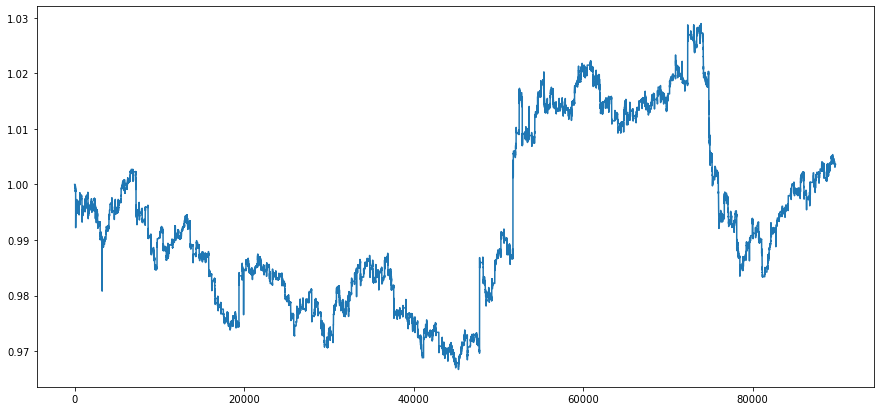

In [19]:
cumulative_returns = np.cumprod(1 + backtest_data['returns'])
benchmark_returns = np.cumprod(1 + backtest_data['qqqclose'].pct_change())
plt.figure(figsize=[15, 7])
plt.plot(cumulative_returns)
#plt.plot(benchmark_returns, color='r')

(array([180., 175., 166., 160., 108.,  87.,  87.,  51.,  38.,  35.,  20.,
         11.,  15.,   8.,   5.,  10.,   3.,   1.,   2.,   2.,   1.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.0, 6.333333333333333, 11.666666666666666, 17.0,
        22.333333333333332, 27.666666666666664, 33.0, 38.33333333333333,
        43.666666666666664, 49.0, 54.33333333333333, 59.666666666666664,
        65.0, 70.33333333333333, 75.66666666666666, 81.0,
        86.33333333333333, 91.66666666666666, 97.0, 102.33333333333333,
        107.66666666666666, 113.0, 118.33333333333333, 123.66666666666666,
        129.0, 134.33333333333331, 139.66666666666666, 145.0,
        150.33333333333331, 155.66666666666666, 161.0], dtype=object),
 <a list of 30 Patch objects>)

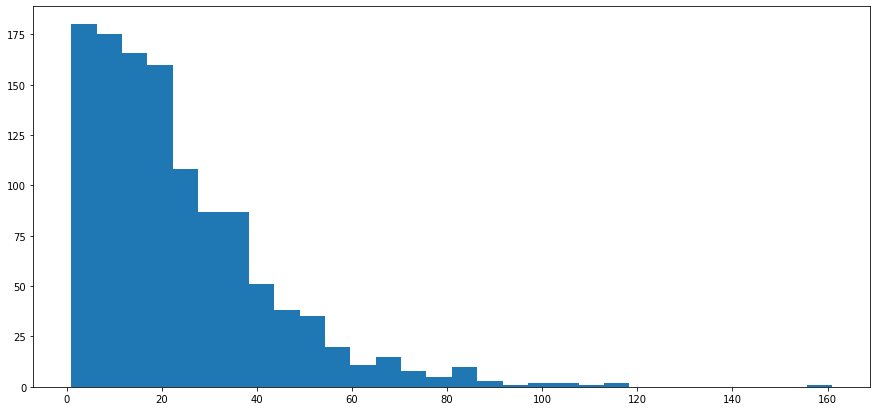

In [20]:
plt.figure(figsize=[15, 7])
plt.hist(tradeLog['holdingPeriod'], bins=30)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  3.,
         4.,  1.,  8.,  6., 10.,  5.,  2.,  2.,  0.,  4.,  2.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([-736.33      , -690.75917333, -645.18834667, -599.61752   ,
        -554.04669333, -508.47586667, -462.90504   , -417.33421333,
        -371.76338667, -326.19256   , -280.62173333, -235.05090667,
        -189.48008   , -143.90925333,  -98.33842667,  -52.7676    ,
          -7.19677333,   38.37405333,   83.94488   ,  129.51570667,
         175.08653333,  220.65736   ,  266.22818667,  311.79901333,
         357.36984   ,  402.94066667,  448.51149333,  494.08232   ,
         539.65314667,  585.22397333,  630.7948    ]),
 <a list of 30 Patch objects>)

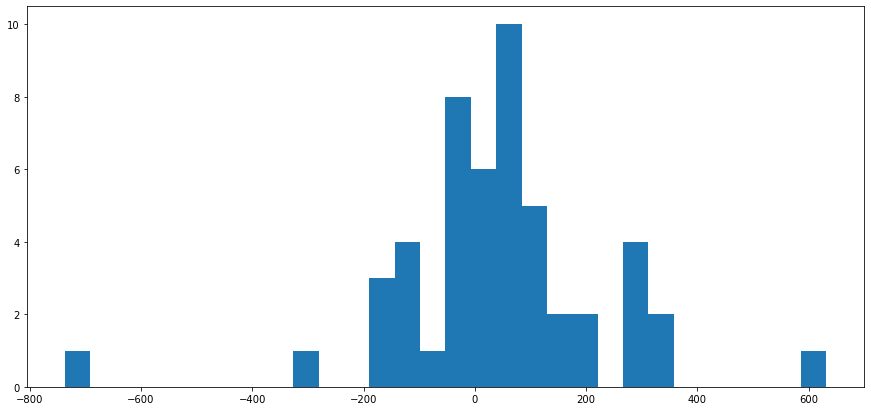

In [21]:
shortTrades = tradeLog.loc[tradeLog['holdingPeriod'] <= 2]
plt.figure(figsize=[15, 7])
plt.hist(shortTrades['profit'], bins=30)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 3., 4., 2., 7.,
        7., 9., 5., 2., 2., 2., 4., 0., 0., 0., 0., 0., 1.]),
 array([-1.97109654e-03, -1.85543530e-03, -1.73977405e-03, -1.62411281e-03,
        -1.50845156e-03, -1.39279032e-03, -1.27712907e-03, -1.16146783e-03,
        -1.04580658e-03, -9.30145337e-04, -8.14484092e-04, -6.98822846e-04,
        -5.83161601e-04, -4.67500356e-04, -3.51839110e-04, -2.36177865e-04,
        -1.20516620e-04, -4.85537446e-06,  1.10805871e-04,  2.26467116e-04,
         3.42128361e-04,  4.57789607e-04,  5.73450852e-04,  6.89112097e-04,
         8.04773343e-04,  9.20434588e-04,  1.03609583e-03,  1.15175708e-03,
         1.26741832e-03,  1.38307957e-03,  1.49874081e-03]),
 <a list of 30 Patch objects>)

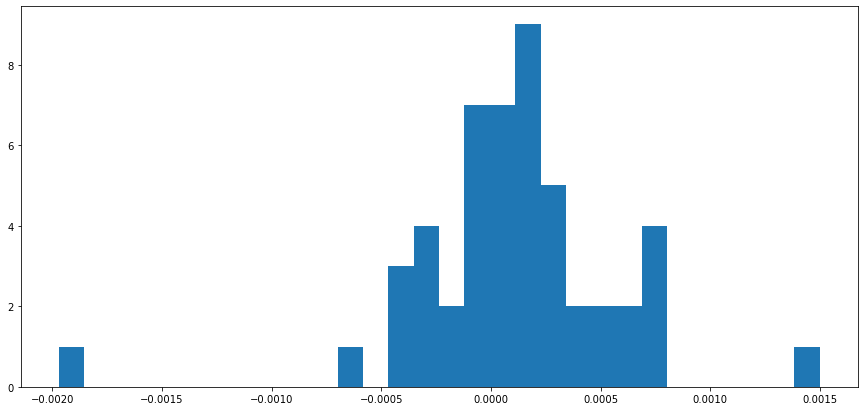

In [22]:
plt.figure(figsize=[15, 7])
plt.hist(shortTrades['returns'], bins=30)

In [23]:
shortTrades['returns'].mean()

0.00010101076427545668